## **ABOUT DATASET**
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

## **DOWNLOAD NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as seabornInstance
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

## **DATA PRE-PROCESSING**

Load Data to begin:

In [ ]:
df_test=pd.read_csv('/content/fraudTest.csv')
df_train=pd.read_csv('/content/fraudTrain.csv')

In [ ]:
df_complete = pd.concat([df_train, df_test])
len(df_complete)

627453

In [ ]:
df_complete.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
df_complete.shape

(627453, 23)

In [ ]:
df_complete.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,627453.000000,6.274520e+05,627452.000000,627452.000000,627451.000000,627451.000000,6.274510e+05,6.274510e+05,627451.000000,627451.000000,627451.000000
mean,156870.072608,4.171069e+17,70.190720,48797.505537,38.538870,-90.217175,8.888690e+04,1.354402e+09,38.538534,-90.217083,0.006005
std,90577.793737,1.308700e+18,153.200924,26884.851645,5.072456,13.747709,3.014717e+05,2.234243e+07,5.107615,13.759698,0.077261
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671575,0.000000
25%,78431.000000,1.800400e+14,9.640000,26237.000000,34.668900,-96.798000,7.420000e+02,1.332619e+09,34.743635,-96.889902,0.000000
50%,156863.000000,3.520550e+15,47.470000,48174.000000,39.371600,-87.476900,2.443000e+03,1.338502e+09,39.369208,-87.429190,0.000000
75%,235294.000000,4.635330e+15,83.230000,72011.000000,41.940400,-80.158000,2.032800e+04,1.376495e+09,41.958362,-80.234918,0.000000
max,315869.000000,4.992350e+18,17897.240000,99783.000000,66.693300,-67.950300,2.906700e+06,1.382050e+09,67.510267,-66.952026,1.000000


In [ ]:
df_complete.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      2
long                     2
city_pop                 2
job                      2
dob                      2
trans_num                2
unix_time                2
merch_lat                2
merch_long               2
is_fraud                 2
dtype: int64

In [ ]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627453 entries, 0 to 311582
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             627453 non-null  int64  
 1   trans_date_trans_time  627453 non-null  object 
 2   cc_num                 627452 non-null  float64
 3   merchant               627452 non-null  object 
 4   category               627452 non-null  object 
 5   amt                    627452 non-null  float64
 6   first                  627452 non-null  object 
 7   last                   627452 non-null  object 
 8   gender                 627452 non-null  object 
 9   street                 627452 non-null  object 
 10  city                   627452 non-null  object 
 11  state                  627452 non-null  object 
 12  zip                    627452 non-null  float64
 13  lat                    627451 non-null  float64
 14  long                   627451 non-null  f

In [ ]:
df_complete.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

<Axes: >

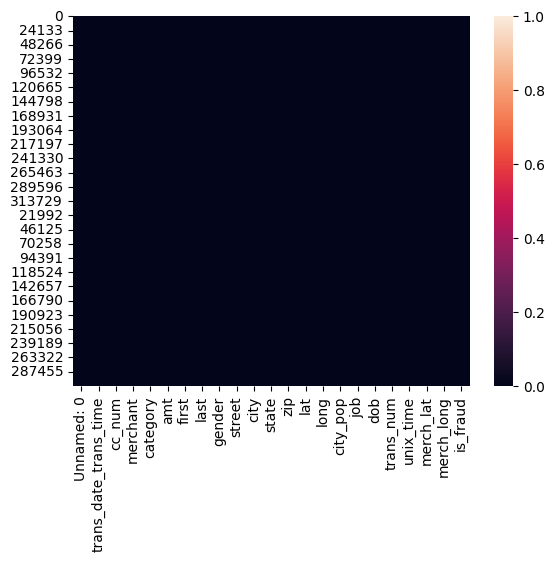

In [ ]:
seabornInstance.heatmap(df_complete.isnull())

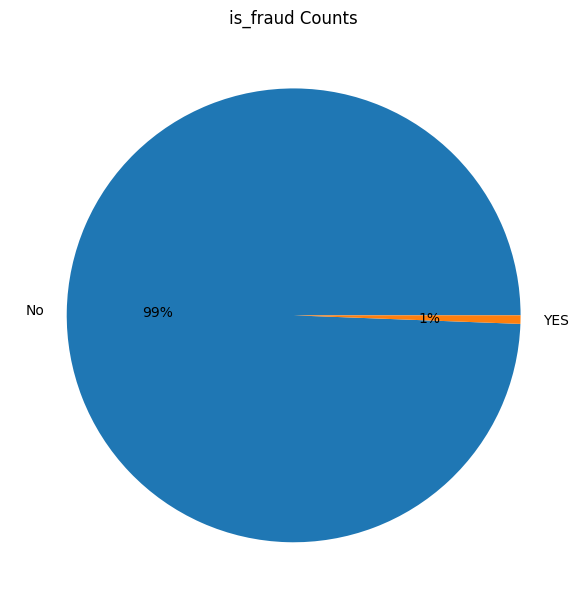

In [ ]:
exit_counts = df_complete["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
df_complete.drop(columns=["Unnamed: 0", "trans_num", "street"], inplace= True)
df_complete

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",3/9/1988,1.325376e+09,36.011293,-82.048315,0.0
1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,6/21/1978,1.325376e+09,49.159047,-118.186462,0.0
2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1/19/1962,1.325376e+09,43.150704,-112.154481,0.0
3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,Boulder,MT,59632.0,46.2306,-112.1138,1939.0,Patent attorney,1/12/1967,1.325376e+09,47.034331,-112.561071,0.0
4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,Doe Hill,VA,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,3/28/1986,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311578,10/17/2020 22:51,4.956830e+18,fraud_Gleason and Sons,kids_pets,87.67,Kenneth,Robinson,M,Elizabeth,NJ,7208.0,40.6747,-74.2239,124967.0,Operational researcher,12/21/1980,1.382050e+09,40.808945,-74.868247,0.0
311579,10/17/2020 22:51,3.710340e+14,"fraud_Dare, Fritsch and Zboncak",health_fitness,31.67,Jeremy,Jones,M,Vinton,CA,96135.0,40.0235,-120.7986,128.0,Education administrator,2/21/1966,1.382050e+09,39.718876,-120.642657,0.0
311580,10/17/2020 22:51,3.576430e+15,"fraud_Bradtke, Torp and Bahringer",personal_care,62.90,Jessica,Ward,F,Phoenix,AZ,85020.0,33.5623,-112.0559,1312922.0,Contractor,10/24/1981,1.382050e+09,33.119345,-111.074255,0.0
311581,10/17/2020 22:52,4.457730e+18,fraud_Wilkinson Ltd,entertainment,79.46,Stanley,Mayo,M,Fiddletown,CA,95629.0,38.5234,-120.6763,832.0,Immigration officer,5/19/1987,1.382050e+09,37.935872,-121.184913,0.0


In [ ]:
data = df_complete.head(n = 20000)
data.is_fraud.value_counts()

is_fraud
0.0    19850
1.0      150
Name: count, dtype: int64

In [ ]:
df_processed = pd.get_dummies(data=data)
df_processed

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,dob_9/30/1978,dob_9/6/1940,dob_9/6/1988,dob_9/7/1948,dob_9/8/1935,dob_9/8/1938,dob_9/8/1969,dob_9/8/1976,dob_9/8/1987,dob_9/9/1927
0,2.703190e+15,4.97,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,0.0,...,False,False,False,False,False,False,False,False,False,False
1,6.304230e+11,107.23,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,0.0,...,False,False,False,False,False,False,False,False,False,False
2,3.885950e+13,220.11,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,0.0,...,False,False,False,False,False,False,False,False,False,False
3,3.534090e+15,45.00,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,0.0,...,False,False,False,False,False,False,False,False,False,False
4,3.755340e+14,41.96,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.104310e+15,98.86,92561.0,33.6401,-116.5567,1661.0,1.326429e+09,33.767565,-117.341778,0.0,...,False,False,False,False,False,False,False,False,False,False
19996,3.034330e+13,2.04,16239.0,41.4622,-79.1306,4172.0,1.326429e+09,40.594885,-79.119914,0.0,...,False,False,False,False,False,False,False,False,False,False
19997,3.502090e+15,38.52,20895.0,39.0298,-77.0793,19054.0,1.326429e+09,39.552430,-77.582253,0.0,...,False,False,False,False,False,False,False,True,False,False
19998,2.706980e+15,110.12,45698.0,39.2830,-82.3977,341.0,1.326429e+09,38.402828,-82.689669,0.0,...,False,False,False,False,False,False,False,False,False,False


***Splitting the Dataset into Training and Testing Data***

In [ ]:
x_train = df_processed.drop(columns='is_fraud', axis=1)
y_train = df_processed['is_fraud']

In [ ]:
x_test = df_processed.drop(columns='is_fraud', axis=1)
y_test = df_processed['is_fraud']

## **LOGISTIC REGRESSION**

In [ ]:
LR = LogisticRegression(solver='liblinear')

LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred= LR.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[19850,     0],
       [  150,     0]])

***Accuracy Of Model***

In [ ]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predictions=LR.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test,predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[19850     0]
 [  150     0]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     19850
         1.0       0.00      0.00      0.00       150

    accuracy                           0.99     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.99      0.99      0.99     20000

0.9925


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **DECISION TREE**

In [ ]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)
classifier

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

***Accuracy Of Model***

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions=dt.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test,predictions))

[[19850     0]
 [    0   150]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19850
         1.0       1.00      1.00      1.00       150

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

1.0


## **RANDOM FOREST ALOGRITHM**




In [ ]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)
classifier

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred= classifier.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

***Accuracy Of Model***

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions=rf.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test,predictions))

[[19850     0]
 [    0   150]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19850
         1.0       1.00      1.00      1.00       150

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

1.0
